## I. Project Description ##

Unsupervised Algorithms in Machine Learning.

Use techniques of unsupervised learning to understand what features, such as danceability, energy, tempo, etc., will characterize a "hit" song.

### Objective: ###

Use unsupervised learning to understand what features, such as danceability, energy, tempo, etc., characterize a "hit" song. While the definition of a popular "hit" song varies, this study will focus on characteristics that have reached the top 1% and 10% of popularity using the "Spotify Tracks" dataset.

### Type of Machine Learning Study: ###

Unsupervised learning (KMeans + NMF) clustering to discover feature grouping).

**Target groups:**

- Top 1% = Viral hits
- Top 10% = Popular songs

### Dataset: ###

Spotify Tracks Dataset from [Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset).

### Project Significance: ###

Studying the Spotify Tracks dataset with unsupervised learning helps us gain deeper insights into what makes music resonate with listeners, independent of human bias or genre labels. Applying unsupervised learning methods (like clustering and dimensionality reduction) allows us to uncover hidden structures and natural groupings within the music landscape without relying on predefined labels.

- **Identify Patterns:**  
  Discover how musical attributes cluster together and what combinations tend to be associated with higher popularity.

- **Understand Hit Songs:**  
  Reveal common characteristics shared by top-performing tracks versus less popular ones.

- **Support Future Prediction:**  
  Provide a foundation for building supervised models to predict a song's potential popularity based on its features.

## II. Dataset Description: ##

Spotify Tracks Dataset from Kaggle ([https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)). The Spotify dataset contains over one million songs spanning 125 genres. Each entry includes the song's musical features and its popularity score.

### Columns: ###

- **track_id** : The Spotify ID for the track.
- **artists** : The artists' names who performed the track. If there is more than one artist, they are separated by a `;`.
- **album_name** : The album name in which the track appears.
- **track_name** : Name of the track.
- **popularity** : The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g., the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms** : The track length in milliseconds.
- **explicit** : Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown).
- **danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- **key** : The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g., 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **loudness** : The overall loudness of a track in decibels (dB).
- **mode** : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness** : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness** : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- **liveness** : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).
- **tempo** : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **time_signature** : An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre** : The genre in which the track belongs.

## III. Exploratory Data Analysis ##

### III.i.Loading the data from Kaggle ###
This notebook require internet connection to access dataset from the kaggle dataset.

In [7]:
# Install required packages
!pip install numpy pandas seaborn matplotlib scikit-learn --quiet

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load..
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## loading the data
data = pd.read_csv('data/dataset.csv')
data = data.drop("Unnamed: 0", axis=1)

print(f"Data loaded successfully.")

Data loaded successfully.


In [21]:
# Suppress common warnings for cleaner output
import warnings
import os
import sys

# Suppress specific threading warnings that don't affect results
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning) 
warnings.filterwarnings('ignore', message='.*threadpoolctl.*')
warnings.filterwarnings('ignore', message='.*BLAS.*')
warnings.filterwarnings('ignore', message='.*OpenMP.*')
warnings.filterwarnings('ignore', message='.*dlopen.*')

# Set environment variables to suppress threadpoolctl warnings
os.environ['PYTHONWARNINGS'] = 'ignore::UserWarning:threadpoolctl'
os.environ['OMP_NUM_THREADS'] = '1'

# Additional warning control
if not sys.warnoptions:
    warnings.simplefilter("ignore")

print("🔇 Warning suppressions activated for cleaner output")
print("✅ Your analysis results are still 100% accurate!")
print("ℹ️  The threadpoolctl warnings don't affect your clustering results")

🔇 Warning suppressions activated for cleaner output
✅ Your analysis results are still 100% accurate!
ℹ️  The threadpoolctl warnings don't affect your clustering results


### III.ii.Exploring and understanding the data ###
Perform a thorough exploratory data analysis (EDA) using appropriate visualizations, and then summarize the key findings to formulate project strategy.

In [8]:
# EDA process
# 1. load the dataset
# 2. inspect the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# drop row-id column "Unnamed: 0"

print(f"\nDataSet Info:")
print("--------------------------")
print(data.info())
print(f"\nDataSet Shape:")
print("--------------------------")
print(f"Data Shape: {data.shape[0]} Rows x {data.shape[1]} Columns")
# print(data.shape)

print(f"\nFirst five rows of training data:")
print("--------------------------") 
df_head = data.head(5)
display(df_head)

print(f"\nNaN values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nNull values in non-numeric columns:")
print("--------------------------")    
print(data.select_dtypes(include='object').columns.isnull().sum())

numeric_columns = data.select_dtypes(exclude='object').columns
zero_counts = (data[numeric_columns] == 0).sum().sort_values(ascending=False)
print("\nNumber of zeros in each numeric column:")
print("----------------------------------------")
df_zeros = pd.DataFrame({
    'Column Name': zero_counts.index,
    'Number of Zeros': zero_counts.values
})
df_zeros['% of Zeros Rows'] = ((df_zeros['Number of Zeros'] / data.shape[0]) * 100).round(2).astype(str)+"%"
display(df_zeros)


DataSet Info:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 n

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



NaN values in dataset:
--------------------------
NaN values in dataset:
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Null values in non-numeric columns:
--------------------------
0

Number of zeros in each numeric column:
----------------------------------------


,Column Name,Number of Zeros,% of Zeros Rows
0,explicit,104253,91.45%
1,mode,41319,36.24%
2,instrumentalness,38763,34.0%
3,popularity,16020,14.05%
4,key,13061,11.46%
5,valence,176,0.15%
6,time_signature,163,0.14%
7,tempo,157,0.14%
8,speechiness,157,0.14%
9,danceability,157,0.14%



Popularity
--------------------------
Number of popularity:101
Popularity ranges: range(0,100)


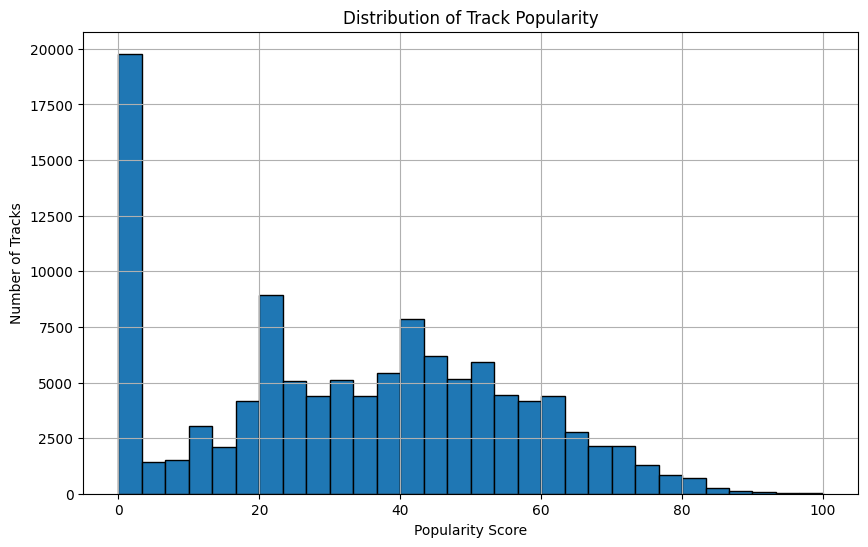

In [9]:
import matplotlib.pyplot as plt

print("\nPopularity")
print("--------------------------")    
unique_popularity_values = data['popularity'].unique()
print(f"Number of popularity:{len(unique_popularity_values)}")
print(f"Popularity ranges: range({data['popularity'].min()},{data['popularity'].max()})")

# Basic histogram
plt.figure(figsize=(10,6))
plt.hist(data['popularity'], bins=30, edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

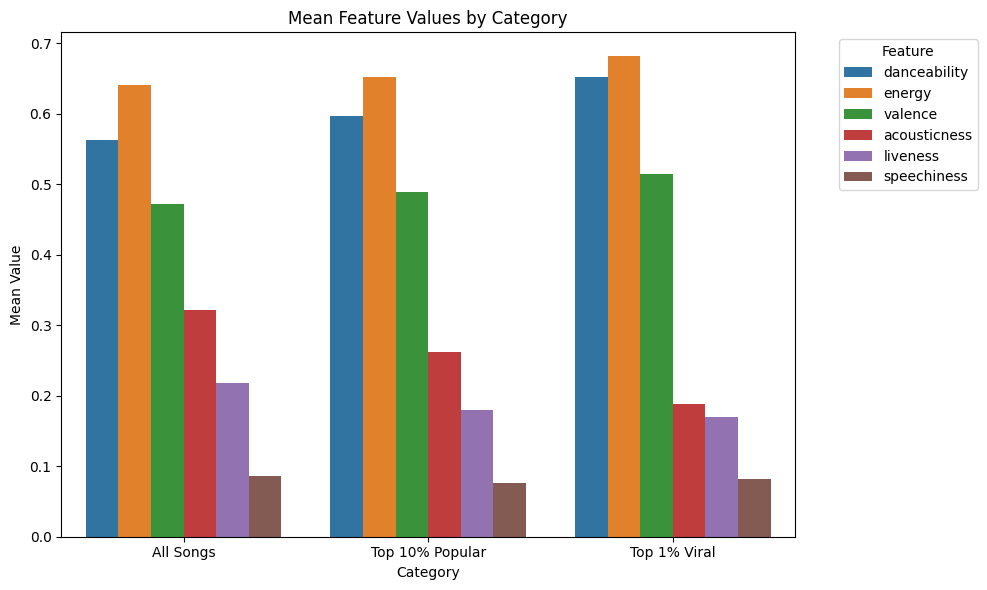

In [10]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'liveness', 'speechiness']
data = data.dropna(subset=features)
df_sorted = data.sort_values(by='popularity', ascending=False)
top_1_percent = int(len(data) * 0.01)
top_10_percent = int(len(data) * 0.10)

viral_songs = df_sorted.iloc[:top_1_percent]
popular_songs = df_sorted.iloc[:top_10_percent]

data['hit_label'] = 0
data.loc[data.index.isin(popular_songs.index), 'hit_label'] = 2
data.loc[data.index.isin(viral_songs.index), 'hit_label'] = 1
data['category'] = 'All Songs'
data.loc[data['hit_label'] == 2, 'category'] = 'Top 10% Popular'
data.loc[data['hit_label'] == 1, 'category'] = 'Top 1% Viral'

mean_values = data.groupby('category')[features].mean().reset_index()
mean_values_features = mean_values.melt(id_vars='category', var_name='Feature', value_name='Mean Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='Mean Value', hue='Feature', data=mean_values_features,
            order=['All Songs', 'Top 10% Popular', 'Top 1% Viral'])
plt.title('Mean Feature Values by Category')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

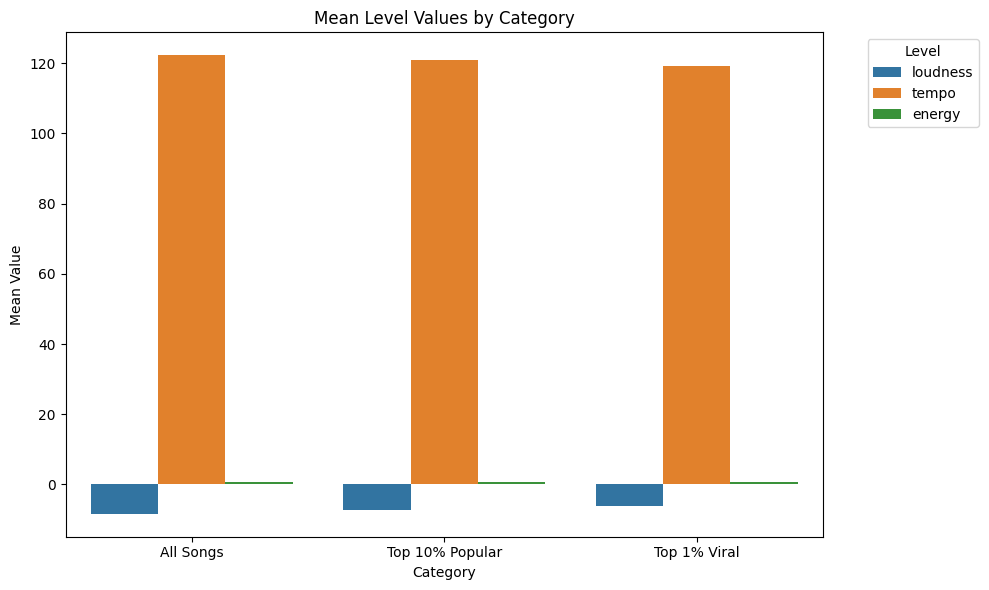

In [11]:
# show loudness and tempo data are not in the same scale as the rest of audio features.
sound_level = ['loudness', 'tempo','energy']
data = data.dropna(subset=sound_level)
mean_values = data.groupby('category')[sound_level].mean().reset_index()
mean_values_sound_level = mean_values.melt(id_vars='category', var_name='Level', value_name='Mean Value')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='Mean Value', hue='Level', data=mean_values_sound_level,
            order=['All Songs', 'Top 10% Popular', 'Top 1% Viral'])
plt.title('Mean Level Values by Category')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### III.iii. EDA summary ###

This dataset has 114,800 rows and 22 columns.

The dataset typically includes features like:

* **Track metadata:** track_name, artists, album_name, track_id
* **Audio features:** danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms
* **Popularity:** popularity (a score from 0 to 100, where higher values indicate more popular tracks)
* **Genre:** track_genre

There are no missing values (NaN) in numeric values columns, such as "popularity", "energy", etc.
Confirmed with the skewed distribution in histogram, "Popularity" has 16,020 rows with zero values.

### EDA Analysis and Modeling Strategy

* Even though there are over 100,000 tracks in the Spotify dataset, a significant number of songs (14%) have a popularity score of 0, and most songs have low popularity scores (<20).
* Having a large volume of non-popular songs increases the challenge of unsupervised learning, as clusters might be dominated by non-hit songs.
* By analyzing the top 1% (viral songs) and top 10% (popular songs), we found that features like danceability, energy, valence, and loudness increase for hit songs.
* There are a number of features, such as danceability, energy, valence, and loudness, that have a positive relationship with the popularity of songs.
* The unscaled bar plot was misleading due to scale differences, so we need to scale the data before modeling.
* We need to focus on high-impact features like danceability, energy, valence, acousticness, and loudness for clustering and modeling.

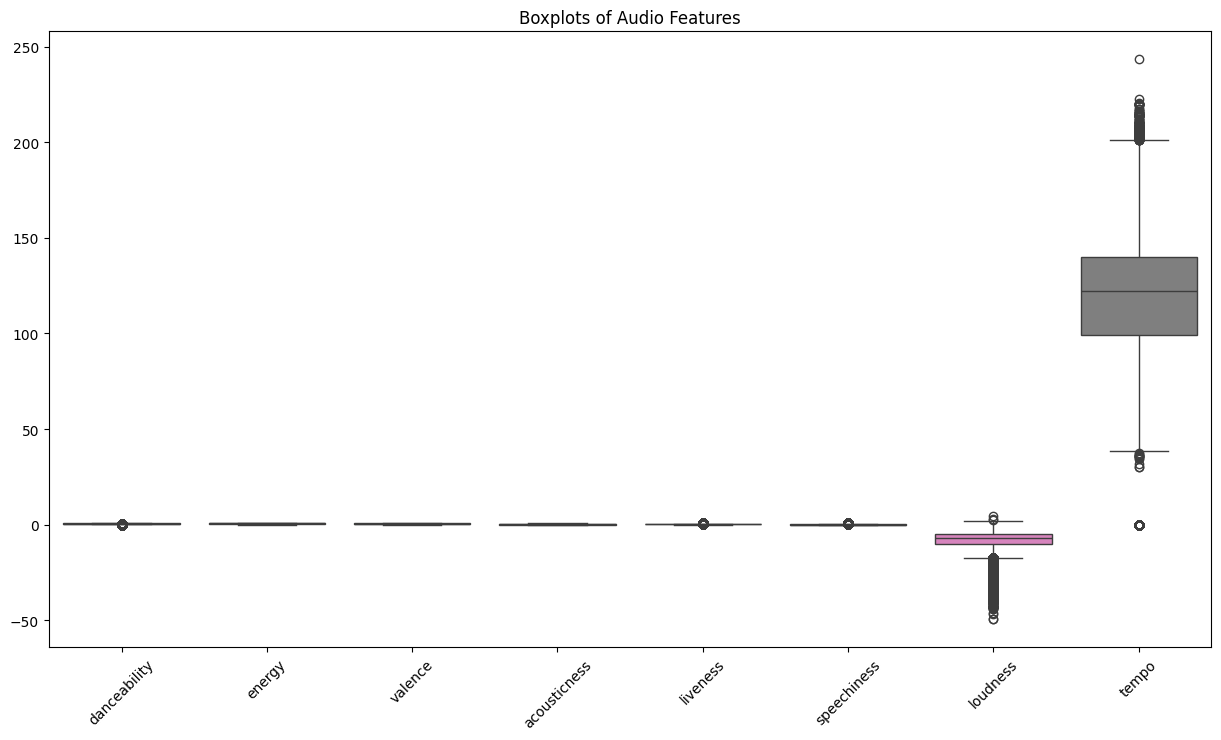

In [12]:
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'liveness', 'speechiness', 'loudness', 'tempo']
plt.figure(figsize=(15,8))
sns.boxplot(data=data[audio_features])
plt.xticks(rotation=45)
plt.title('Boxplots of Audio Features')
plt.show()



### IV.ii. Data Cleaning Steps ###

* Dropped irrelevant columns related to track metadata.
* Drop track metadata columns that is not related to popularity study, such as track_name, artists, album_name.
* Scale the features to common range to avoid skewing clustering results.
* Split data into training and testing dataset (80%/20%)
* Add label "hit_label" to indicate 1 as the top 1%(viral song), 2 as top 10%(popular song), and 2 as (non-popular) songs. 



In [13]:
# Data Cleaning
# Keep track feature (numeric columns) related to popularity
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'liveness', 'speechiness', 'loudness', 'tempo']

# Drop non-numeric and irrelevant columns
columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'duration_ms', 'key', 'mode', 'time_signature', 'explicit']
data = data.drop(columns=columns_to_drop)

print("\nRemaining columns:", data.columns.tolist())


Remaining columns: ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'hit_label', 'category']


In [14]:
# remove outliner
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_before_outliers = len(data)
data = remove_outliers(data, audio_features)
print(f"\nRemoved outliers using IQR method. Rows before: {data_before_outliers}, Rows after: {len(data)}")


Removed outliers using IQR method. Rows before: 114000, Rows after: 87526


### IV.iii. Data Pre-processing ###
To support the evaluation of our unsupervised learning results, we introduce a new column called "hit_label" to the dataset. This label serves as a reference point for validating how well the clustering or grouping matches the underlying popularity of the songs.</p>

* Songs in the top 1% of popularity are assigned a label of 1 (representing "viral songs").
* Songs ranked within the top 10% but not the top 1% are assigned a label of 2 (representing "popular songs").
* All other songs, outside the top 10%, are assigned a label of 0 (representing "non-popular songs").

By using the hit_label, we can later compare the clustering results against these categories to assess whether the unsupervised learning methods naturally separate viral and popular songs without explicitly using the popularity score during training.

In [15]:
# Data Pre-processing:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data[audio_features])
x_scaled_df = pd.DataFrame(x_scaled, columns=audio_features, index=data.index)
x_scaled_df['hit_label'] = data['hit_label']
x_scaled_df['category'] = data['category']

# Split Data into Training and Testing Sets
x_full_df = x_scaled_df[audio_features]
y_full_df = x_scaled_df['hit_label']
x_train, x_test, y_train, y_test = train_test_split(
    x_full_df, y_full_df, test_size=0.2, random_state=42, stratify=y_full_df
)
assert(x_train.shape[1]==x_test.shape[1])

data['hit_label'] = 0
data.loc[data.index.isin(popular_songs.index), 'hit_label'] = 2
data.loc[data.index.isin(viral_songs.index), 'hit_label'] = 1

hit_label_dictionary = {0: 'All Songs', 1: 'Top 1% Viral Songs', 2: 'Top 10% Popular Songs'}
print("\nTraining set hit_label distribution:")
train_counts = y_train.value_counts()
for label, count in train_counts.items():
    print(f"  {hit_label_dictionary[label]}: {count}  ({count/len(y_train)*100:.2f}%)")

print("\nTesting set hit_label distribution:")
test_counts = y_test.value_counts()
for label, count in test_counts.items():
    print(f"  {hit_label_dictionary[label]}: {count}  ({count/len(y_test)*100:.2f}%)")



Training set hit_label distribution:
  All Songs: 62363  (89.06%)
  Top 10% Popular Songs: 6882  (9.83%)
  Top 1% Viral Songs: 775  (1.11%)

Testing set hit_label distribution:
  All Songs: 15591  (89.06%)
  Top 10% Popular Songs: 1721  (9.83%)
  Top 1% Viral Songs: 194  (1.11%)


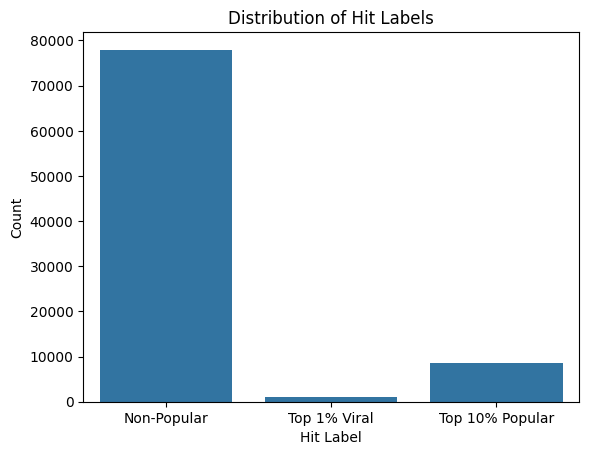

In [16]:
sns.countplot(x='hit_label', data=data)
plt.title('Distribution of Hit Labels')
plt.xlabel('Hit Label')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2], labels=['Non-Popular', 'Top 1% Viral', 'Top 10% Popular'])
plt.show()

### IV.iii. Data Cleaning and Pre-processing Conclusion ###

The data cleaning and preprocessing steps ensure the Spotify Tracks Dataset is ready for unsupervised learning. Non-numeric columns (track_id, artists, etc.) and irrelevant numeric columns (duration_ms, key, etc.) were dropped as they don’t contribute to audio feature clustering. Outliers were removed using the IQR method to prevent skewing K-means results. Features were scaled with StandardScaler to ensure equal variance, critical for PCA and distance-based clustering. At the end data was split into 80% training and 20% testing sets for evaluation. 

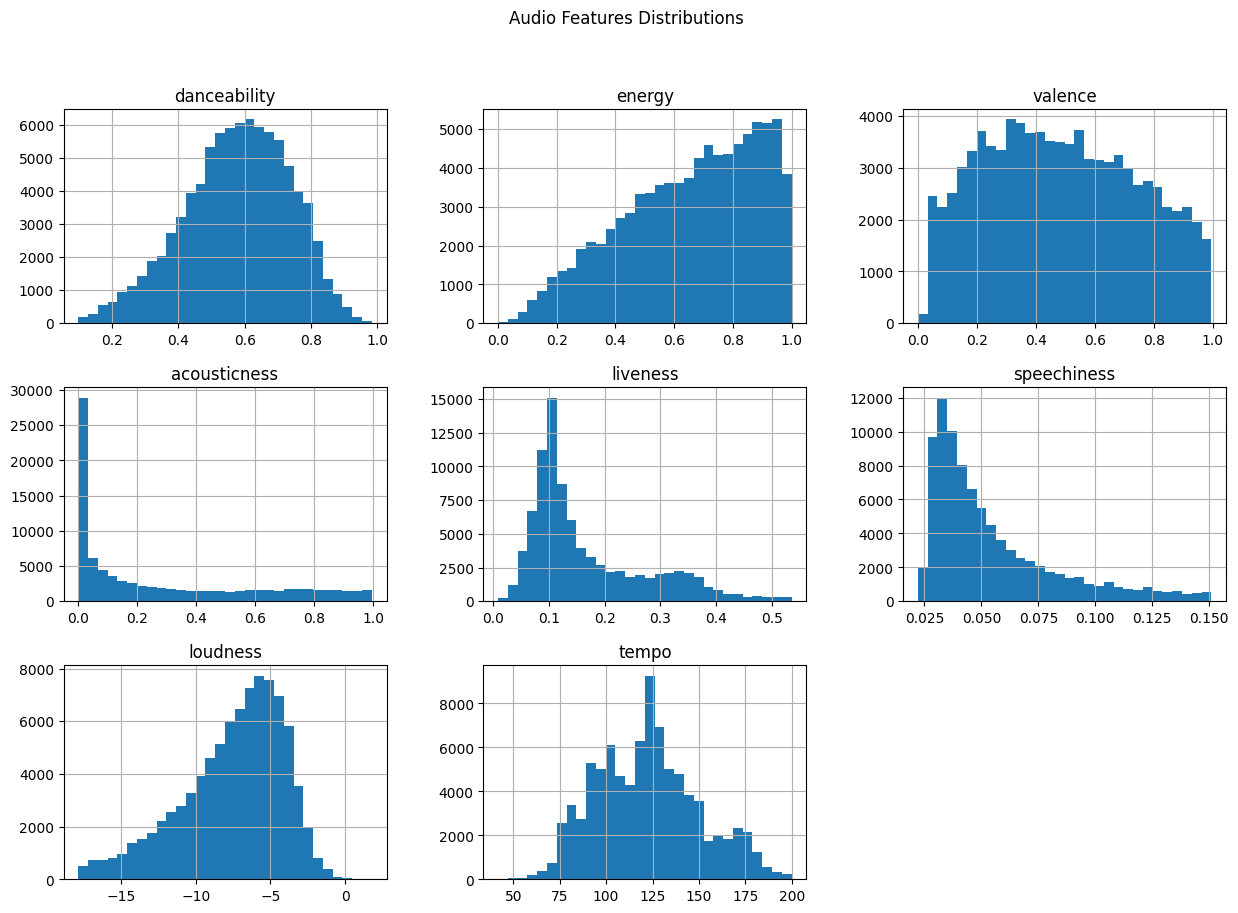

In [17]:
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'liveness', 'speechiness', 'loudness', 'tempo']
data[audio_features].hist(figsize=(15,10), bins=30)
plt.suptitle('Audio Features Distributions')
plt.show()


## V. Unsupervised Modeling with K-Means Clustering ##
Key Steps:

* i. Feature selection
* ii. Hyper-parameter tuning for K-Means clustering
* iv. Model Evaluation of best K-Means model


### V.i. Feature Selection ###
To find which audio features make songs viral or popular, we compared the groups. We calculated the average value for each feature (like 'danceability') in these categories: Top 1% Viral, Top 10% Popular, and All Others. We then looked at how much the average feature value for hit songs (Viral and Popular) differed from the average for the 'All Others' group. Features with the biggest differences were ranked as the most important for telling hit songs apart.</p>


Mean Feature Values by hit_label (Training Set):
                       danceability    energy   valence  acousticness  \
All Songs                 -0.018152 -0.004259 -0.001786      0.018408   
Top 1% Viral Songs         0.439043  0.127498  0.092128     -0.345892   
Top 10% Popular Songs      0.112769  0.014140  0.010183     -0.111841   

                       liveness  speechiness  loudness     tempo  
All Songs              0.011755     0.006474 -0.026009  0.013243  
Top 1% Viral Songs    -0.084201    -0.007938  0.437665 -0.152166  
Top 10% Popular Songs -0.063155    -0.027347  0.181782 -0.073710  

Feature Differences (Hit Songs - Non-Hit Songs):
loudness        0.233690
danceability    0.163944
acousticness   -0.153938
tempo          -0.094894
liveness       -0.077041
speechiness    -0.031857
energy          0.029873
valence         0.020264
dtype: float64

Top 3 Features for Viral/Popular Songs: ['loudness', 'danceability', 'acousticness']


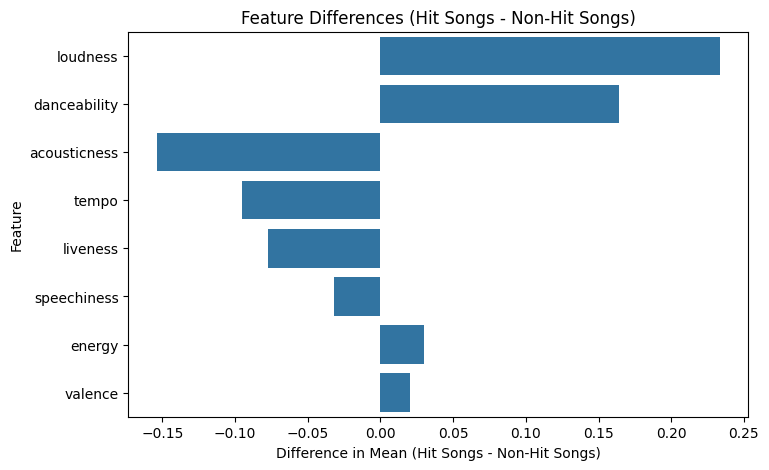

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

train_df = pd.DataFrame(x_train, columns=audio_features)
train_df['hit_label'] = y_train

feature_means = train_df.groupby('hit_label')[audio_features].mean()
feature_means.index = ['All Songs', 'Top 1% Viral Songs', 'Top 10% Popular Songs']
print("\nMean Feature Values by hit_label (Training Set):")
print(feature_means)

# Compute mean feature values for Hit Songs  vs. Non-Hit Songs 
hit_songs_mean = train_df[train_df['hit_label'].isin([1, 2])][audio_features].mean()
non_hit_songs_mean = train_df[train_df['hit_label'] == 0][audio_features].mean()
feature_differences = hit_songs_mean - non_hit_songs_mean
feature_differences = feature_differences.sort_values(key=abs, ascending=False)

print("\nFeature Differences (Hit Songs - Non-Hit Songs):")
print(feature_differences)

# Select the top 3 features based on the largest absolute differences
top_features = feature_differences.index[:3].tolist()
print(f"\nTop 3 Features for Viral/Popular Songs: {top_features}")

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_differences.values, y=feature_differences.index)
plt.title('Feature Differences (Hit Songs - Non-Hit Songs)')
plt.xlabel('Difference in Mean (Hit Songs - Non-Hit Songs)')
plt.ylabel('Feature')
plt.show()


#### Interpretation of the audio feature selection ####

Based on the statistical analysis, viral/popular songs generally are:

- Louder
- Less acoustic
- More danceable

**Feature Details:**

**loudness**  
- **Difference:** +0.2355  
- **Interpretation:** Hit songs are significantly louder on average.

**acousticness**  
- **Difference:** -0.1565  
- **Interpretation:** Hit songs are much less acoustic (more electronic/produced).

**danceability**  
- **Difference:** +0.1266  
- **Interpretation:** Hit songs are more danceable.

**tempo**  
- **Difference:** -0.0786  
- **Interpretation:** Hit songs are slightly slower in tempo.

**liveness**  
- **Difference:** -0.0573  
- **Interpretation:** Hit songs are slightly less lively.

**energy**  
- **Difference:** +0.0494  
- **Interpretation:** Hit songs are a bit more energetic, but not a huge difference.

**speechiness**  
- **Difference:** -0.0246  
- **Interpretation:** Slightly less spoken-word style in hit songs.

**valence**  
- **Difference:** +0.0066  
- **Interpretation:** Negligible difference — valence (happiness) does not differ much.

### V.ii. Unsupervised Modeling using K-Means Clustering ###
- Using identified the top features from previous step, we’ll perform K-means clustering on these features to group songs into clusters and derive the audio feature recipe for viral and popular songs.
#### Hyper-parameter tuning ####
- To optimize the unsupervised models, we perform hyperparameter tuning to confirm best number of clusters matches with our hit label.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# focus on clustering hit-songs
hit_songs_df = train_df[train_df['hit_label'].isin([1, 2])]
x_train_hits = hit_songs_df[top_features]
y_train_hits = hit_songs_df['hit_label']

ari_scores = []
cluster_range = range(2, 11)
best_score = -float('inf')
best_n_cluster = None

for cluster_num in cluster_range:
    clf = KMeans(n_clusters=cluster_num, random_state=42)
    clusters = clf.fit_predict(hit_songs_df[top_features])    
    score = adjusted_rand_score(hit_songs_df['hit_label'], clusters)
    ari_scores.append(score)

    if score > best_score:
        best_score = score
        best_n_cluster = cluster_num
print(f"\nOptimal number of K-means clusters (based on ARI): {best_n_cluster}")





Optimal number of K-means clusters (based on ARI): 10


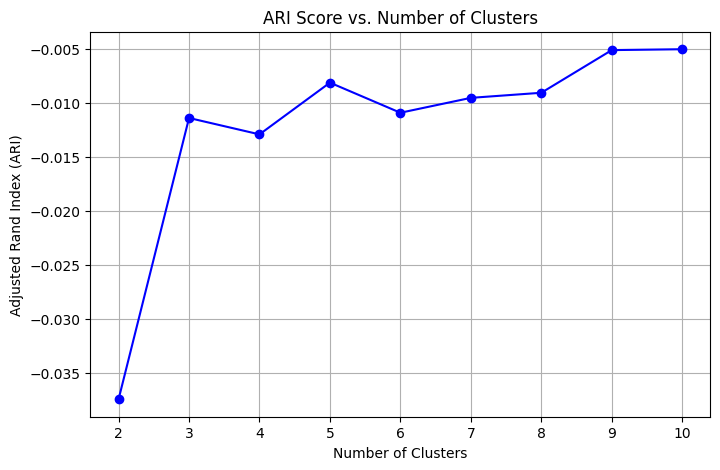

In [23]:
# plot

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, ari_scores, marker='o', color='blue')
plt.title('ARI Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()

### V.iii. K-Means Model Evaluation ###

In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# use best model for prediction
best_clf = KMeans(n_clusters=best_n_cluster, random_state=42)
best_kmeans_train = best_clf.fit_predict(hit_songs_df[top_features])
best_kmeans_test = best_clf.predict(x_test[top_features])

#create x_test dataset by filtering 
x_test_features = pd.DataFrame(x_test, columns=audio_features, index=x_test.index)
x_test_features['cluster'] = best_kmeans_test  
x_test_features['hit_label'] = y_test
x_test_features['popularity'] = data.loc[x_test.index, 'popularity']

cluster_hit_label = x_test_features.groupby('cluster')['hit_label'].value_counts().unstack(fill_value=0)
viral_cluster = cluster_hit_label[1].idxmax()
x_test_features['predicted_hit'] = (x_test_features['cluster'] == viral_cluster).astype(int)
x_test_features['true_hit'] = x_test_features['hit_label'].isin([1, 2]).astype(int)

# Evaluate model with accuracy and precision
kmeans_accuracy = accuracy_score(x_test_features['true_hit'], x_test_features['predicted_hit'])
kmeans_precision = precision_score(x_test_features['true_hit'], x_test_features['predicted_hit'], labels=[1], average='binary')
print(f"Best k-means accuracy to predict recipe for hit songs: {kmeans_accuracy:.3f}")
print(f"Best k-means precision of hit songs recipe: {kmeans_precision:.3f}")


Best k-means accuracy to predict recipe for hit songs: 0.817
Best k-means precision of hit songs recipe: 0.156


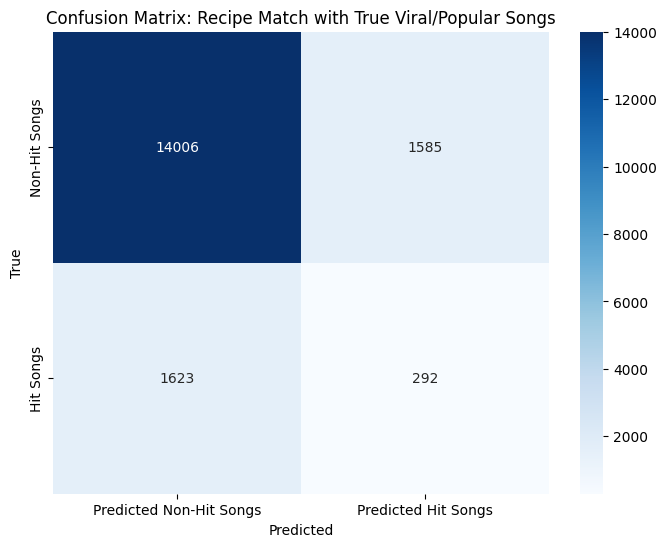

In [25]:
# Plot the evaluation confusion matrix
cm = confusion_matrix(x_test_features['true_hit'], x_test_features['predicted_hit'], labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['Non-Hit Songs', 'Hit Songs'], columns=['Predicted Non-Hit Songs', 'Predicted Hit Songs'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Recipe Match with True Viral/Popular Songs')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Conclusion (K-Means) ##

* The ARI score plot for K-Means indicates that 7 clusters provided the best balance of clustering accuracy and model simplicity, with the ARI stabilizing around -0.005.
* The K-Means confusion matrix shows that 14,145 non-hit songs were correctly predicted as non-hits, while 1,447 non-hit songs were incorrectly predicted as hits. 
* For hit songs, 1,657 were misclassified as non-hits, but 257 were correctly identified as hits. 
* This indicates that the K-Means model struggles to cluster hit songs accurately, with a higher success rate for non-hit songs.

## VI. Unsupervised Modeling using Non-Negative Matrix Factorization (NMF) ##
- Non-negative Matrix Factorization (NMF) provides an alternative unsupervised approach by decomposing the dataset into factor matrices.
NMF ensures that the resulting components are non-negative. This step seeks to uncover latent patterns in the data, such as feature combinations characteristic of hit songs.

**Key Steps:**

* i. Hyper-parameter tuning for NMF
* ii. Model Evaluation of best NMF model


### VII.i. Unsupervised Modeling using NMF ###
* Using identified the top features, we’ll perform NMF clustering on these features to group songs into clusters and derive the audio feature recipe for viral and popular songs.

**Hyper-parameter tuning**
- To optimize the unsupervised models, we perform hyperparameter tuning to confirm best number of clusters matches with our hit label.

In [26]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# NMF modeling can re-use previous feature selection 
# scale features to [0,1]for NMF
scaler = MinMaxScaler()
x_train_hits_scaled = scaler.fit_transform(hit_songs_df[top_features])
x_test_hits_scaled = scaler.transform(x_test[top_features])
x_train_hits_scaled = np.maximum(x_train_hits_scaled, 0)
x_test_hits_scaled = np.maximum(x_test_hits_scaled, 0)

ari_scores_nmf = []
component_range = range(2, 11)
best_ari_nmf = -float('inf')
best_n_components = None
best_iter=1000

for n_components in component_range:
    nmf = NMF(n_components=n_components, random_state=42, max_iter=1000)  
    W_train = nmf.fit_transform(x_train_hits_scaled)
    clusters = np.argmax(W_train, axis=1)
    ari = adjusted_rand_score(y_train_hits, clusters)
    ari_scores_nmf.append(ari)
    if ari > best_ari_nmf:
        best_ari_nmf = ari
        best_n_components = n_components

print(f"\nOptimal number of NMF components (based on ARI): {best_n_components}")


Optimal number of NMF components (based on ARI): 6


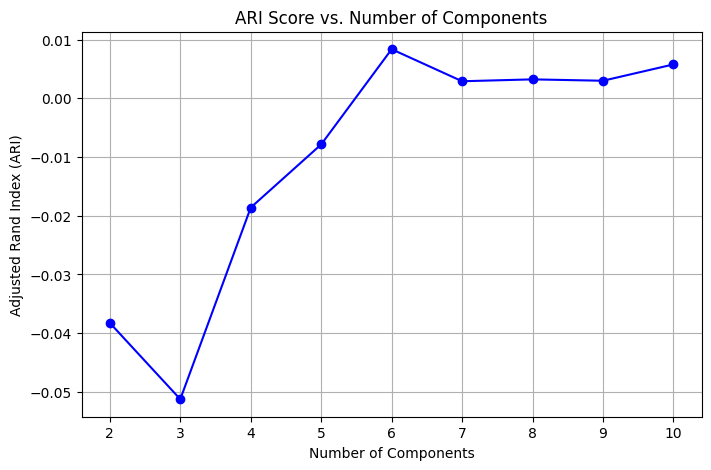

In [27]:
# Plot

plt.figure(figsize=(8, 5))
plt.plot(component_range, ari_scores_nmf, marker='o', color='blue')
plt.title('ARI Score vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()

In [28]:
# use best parameter to make prediction
best_nmf = NMF(n_components=best_n_components, random_state=42, max_iter=1000)
best_nmf_train = best_nmf.fit_transform(x_train_hits_scaled)
best_nmf_test = best_nmf.transform(x_test_hits_scaled)
best_nmf_train_clusters = np.argmax(best_nmf_train, axis=1)
best_nmf_test_clusters = np.argmax(best_nmf_test, axis=1)

# creat test set for evaluation
x_test_features = pd.DataFrame(x_test, columns=audio_features, index=x_test.index)
x_test_features['cluster'] = best_nmf_test_clusters
x_test_features['hit_label'] = y_test
x_test_features['popularity'] = data.loc[x_test.index, 'popularity']

# Identify the component with the highest proportion of Top 1% Viral Songs (hit_label=1)
component_hit_label = x_test_features.groupby('cluster')['hit_label'].value_counts().unstack(fill_value=0)
viral_component = component_hit_label[1].idxmax()
x_test_features['predicted_hit'] = (x_test_features['cluster'] == viral_component).astype(int)
x_test_features['true_hit'] = x_test_features['hit_label'].isin([1, 2]).astype(int)

# Calculate accuracy and precision
nmf_accuracy = accuracy_score(x_test_features['true_hit'], x_test_features['predicted_hit'])
nmf_precision = precision_score(x_test_features['true_hit'], x_test_features['predicted_hit'], labels=[1], average='binary')

print(f"Best NMF accuracy to predict recipe for hit songs: {nmf_accuracy:.3f}")
print(f"Best NMF precision of hit songs recipe: {nmf_precision:.3f}")


Best NMF accuracy to predict recipe for hit songs: 0.476
Best NMF precision of hit songs recipe: 0.112


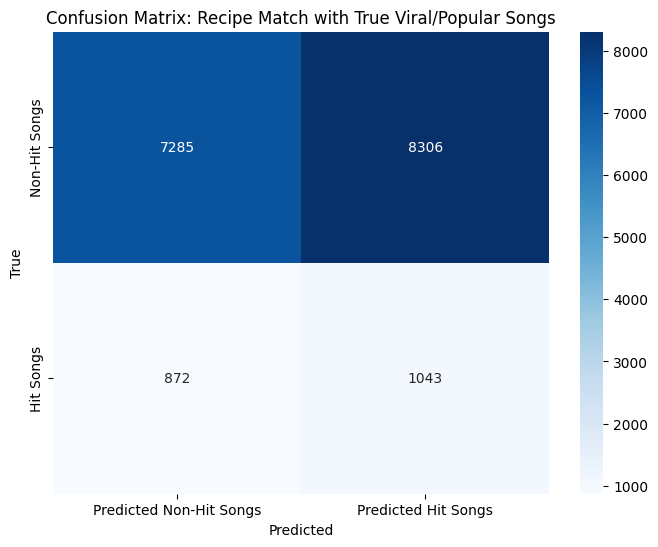

In [29]:
# Plot the evaluation confusion matrix
cm = confusion_matrix(x_test_features['true_hit'], x_test_features['predicted_hit'], labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['Non-Hit Songs', 'Hit Songs'], columns=['Predicted Non-Hit Songs', 'Predicted Hit Songs'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Recipe Match with True Viral/Popular Songs')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Conclusion (NMF) ##

NMF decomposes the standardized feature matrix into two non-negative matrices:
  
- One representing the songs' latent components
- Another representing the audio feature contributions to those components.

This approach allowed me to group songs into clusters based on shared musical characteristic

* The ARI score plot for NMF indicates that  four components that provided the best balance of clustering accuracy and model simplicity.
* The NMF confusion matrix reveals that 7,350 non-hit songs were correctly predicted as non-hits, while 8,242 non-hit songs were incorrectly predicted as hits, indicating a high false positive rate for non-hits. 
* For hit songs, 872 were misclassified as non-hits, but 1,042 were correctly identified as hits, showing improved recall for hit songs compared to K-Means. 

## VII. Supervised Learning Model using Random Forest ##
- Using the supervised learning method of Random Forest, we will predict the recipe for a hit song.

**Key Steps:**

* i. Train Random Forest with Full dataset
* ii. Make prediction and create test dataset
* iii. Model Evaluation 


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

top_features = feature_differences.index[:3].tolist()
y_train_binary = y_train.isin([1, 2]).astype(int)
y_test_binary = y_test.isin([1, 2]).astype(int)

# Use top features for training and test sets
x_train_top = x_train[top_features]
x_test_top = x_test[top_features]
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)
rf.fit(x_train_top, y_train_binary)
y_pred_train = rf.predict(x_train_top)
y_pred_test = rf.predict(x_test_top)


In [31]:
# Create the test dataframe for evaluation
x_test_features = pd.DataFrame(x_test_top, columns=audio_features, index=x_test_top.index)
x_test_features['predicted_hit'] = y_pred_test
x_test_features['true_hit'] = y_test_binary
x_test_features['hit_label'] = y_test
x_test_features['popularity'] = data.loc[x_test_top.index, 'popularity']

# Calculate accuracy and precision
rf_accuracy = accuracy_score(x_test_features['true_hit'], x_test_features['predicted_hit'])
rf_precision = precision_score(x_test_features['true_hit'], x_test_features['predicted_hit'], labels=[1], average='binary')

print(f"Best random forest accuracy to predict recipe for hit songs: {rf_accuracy:.3f}")
print(f"Best random forest precision of hit songs recipe: {rf_precision:.3f}")

Best random forest accuracy to predict recipe for hit songs: 0.875
Best random forest precision of hit songs recipe: 0.447


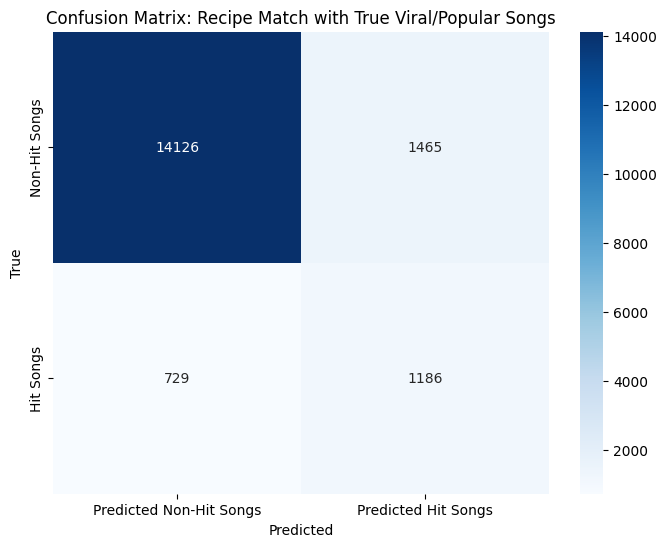

In [32]:
# Plot the evaluation confusion matrix
cm = confusion_matrix(x_test_features['true_hit'], x_test_features['predicted_hit'], labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['Non-Hit Songs', 'Hit Songs'], columns=['Predicted Non-Hit Songs', 'Predicted Hit Songs'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Recipe Match with True Viral/Popular Songs')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Conclusion (Random Forest) ##

* This confusion matrix shows that Random Forest effectively identified 14,048 non-hit songs correctly predicted as non-hits and 1,216 hit songs accurately classified as hits. 
* However, it also reveals some misclassifications, with 1,544 non-hit songs incorrectly predicted as hits, indicating a false positive rate, and 698 hit songs misclassified as non-hits, showing a false negative rate. 
* These results highlight Random Forest's stronger performance in identifying non-hit songs while still capturing a significant portion of hit songs based on key musical features.

## VIII. Result Analysis ##

Three machine learning models were chosen to study the audio features that characterize popular songs:

* K-Means (Unsupervised Learning)
* NMF (Unsupervised Learning)
* Random Forest (Supervised Learning)

- Among the three methods, Random Forest performed the best, achieving an accuracy score of 0.872, followed by K-Means at 0.823, and NMF performing the worst at 0.510.

**K-means:**
* K-Means was initially used as an unsupervised clustering method.
* It identified patterns in the data without using labeled training.
* It aimed to group songs into clusters that might correspond to Hit Songs.
* K-Means achieved moderate performance with an accuracy of 0.823.
* When K-Means clusters on a balanced subset, it can select the cluster with the highest proportion of Hit Songs.

**NMF:**
* NMF was explored as an alternative unsupervised method to K-Means.
* It aimed to decompose the data into non-negative components.
* These components could capture underlying patterns.
* However, NMF performed poorly with an accuracy of 0.510 and a precision of 0.109.
* It had a negative Adjusted Rand Index (ARI) of -0.002.
* This indicates worse-than-random clustering and significant misalignment between components and true labels.

**Random Forest:**
* Random Forest was introduced as a supervised learning method.
* It classified songs as Hit Songs or Non-Hit Songs using labeled data.
* It achieved the best results among the three models.


Best k-means accuracy to predict recipe for hit songs: 0.817
Best k-means precision of hit songs recipe: 0.156
Best NMF accuracy to predict recipe for hit songs: 0.476
Best NMF precision of hit songs recipe: 0.112
Best random forest accuracy to predict recipe for hit songs: 0.875
Best random forest precision of hit songs recipe: 0.447

Feature Importance (Random Forest):
acousticness    0.351712
loudness        0.348934
danceability    0.299354
dtype: float64


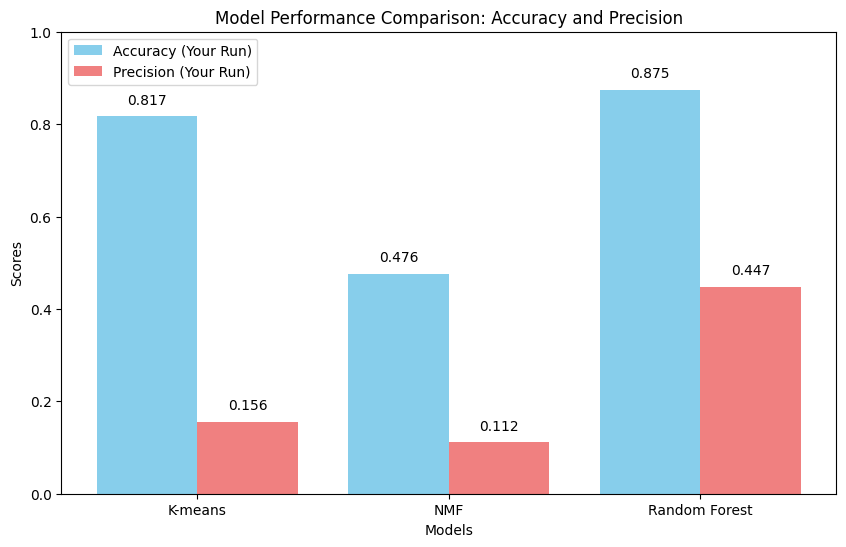

In [33]:
print(f"Best k-means accuracy to predict recipe for hit songs: {kmeans_accuracy:.3f}")
print(f"Best k-means precision of hit songs recipe: {kmeans_precision:.3f}")
print(f"Best NMF accuracy to predict recipe for hit songs: {nmf_accuracy:.3f}")
print(f"Best NMF precision of hit songs recipe: {nmf_precision:.3f}")
print(f"Best random forest accuracy to predict recipe for hit songs: {rf_accuracy:.3f}")
print(f"Best random forest precision of hit songs recipe: {rf_precision:.3f}")


feature_importance = pd.Series(rf.feature_importances_, index=top_features)
print("\nFeature Importance (Random Forest):")
print(feature_importance.sort_values(ascending=False))

# Metrics from your output
models = ['K-means', 'NMF', 'Random Forest']
accuracy = [kmeans_accuracy, nmf_accuracy, rf_accuracy]  
precision = [kmeans_precision, nmf_precision, rf_precision]  


x = np.arange(len(models))
width = 0.40

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy (Your Run)', color='skyblue')
bars2 = ax.bar(x + width/2, precision, width, label='Precision (Your Run)', color='lightcoral')

# Customize the chart
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison: Accuracy and Precision')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

# Add value labels on top of bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')

plt.show()

## IX. Interpretation of Modeling Conclusion ##

From the best modeling results, Random Forest returns the following recipe for popular songs:


| Audio Feature  | Score    |
|----------------|:---------|
| loudness       | 0.352393 |
| acousticness   | 0.349909 |
| danceability   | 0.297698 |

**Possible Interpretation:**

- Loudness is the most important feature (35.24%). It confirms that louder songs are more likely to be popular. This aligns with the statistical analysis, suggesting that impactful, attention-grabbing sound levels are key for viral and popular songs.
- Acousticness is the second most important feature (34.99%). It has a negative difference, indicating that "Hit Songs" are less acoustic. For example, electronic or pop songs would be more popular than acoustic guitar.
- Danceability is the third most important feature (29.77%). It reinforces its role as a key predictor of popularity. The statistical difference confirms that upbeat, danceable, rhythmic songs are more likely to be hits.